The next tutorial was taked from https://koldopina.com/regresion-lineal-simple/

# 1. From scratch without scikit library

### 1. Imports and load data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import csv

In [5]:
with open('data_LR.csv', 'r') as f:
    reader = csv.reader(f, delimiter='|')
    OUTDOOR_TEMP = []
    ELECTRIC_POWER = []
    header = next(reader)
    for index, row in enumerate(reader):
        try:
            outNum = float(row[0].replace(",", "."))
        except:
            outNum = None
        OUTDOOR_TEMP.append(outNum)
        try:
            elecNum = float(row[1].replace(",", "."))
        except:
            elecNum = None
        ELECTRIC_POWER.append(elecNum) 

### 2. First approach to data

In [6]:
def info(header, data_list):
    """
    :param header: lista con los encabezados de las columnas
    :param data_list: lista con las listas de datos de las columnas: [lista1, lista2, etc...]
    :return: diccionario de diccionarios con número de registros, tipo de dato, número de na,
              media, std, min, max de cada columna.
    """

    from collections import defaultdict

    header = header
    columns = data_list
    values = defaultdict()
    for index, head in enumerate(header):
        aux = defaultdict()
        aux['len'] = len(columns[index])
        aux['clases'] = set([type(ele) for ele in columns[index]])
        aux['na'] = sum(1 for ele in columns[index] if ele == None)
        # media
        media = sum(ele for ele in columns[index] if ele != None) / len(columns[index])
        aux['media'] = media
        # std
        n = sum(1 for ele in columns[index] if ele != None)
        std = ((1 / (n - 1)) * sum((ele - media) ** 2 for ele in columns[index] if ele != None)) ** 0.5
        aux['std'] = std
        # minimo
        aux['min'] = min(ele for ele in columns[index] if ele != None)
        # maximo
        aux['max'] = max(ele for ele in columns[index] if ele != None)
        values[head] = aux
    return values

In [14]:
print('_'*60 + 'COLUMNS')
print (header)
print('_'*60 + 'INFO')
print(info(header, [OUTDOOR_TEMP, ELECTRIC_POWER]))

____________________________________________________________COLUMNS
['OUTDOOR_TEMP', 'ELECTRIC_POWER']
____________________________________________________________INFO
defaultdict(None, {'OUTDOOR_TEMP': defaultdict(None, {'len': 1496, 'clases': {<class 'float'>}, 'na': 0, 'media': 28.544429085561454, 'std': 6.364374947698145, 'min': 0.0, 'max': 38.310135}), 'ELECTRIC_POWER': defaultdict(None, {'len': 1496, 'clases': {<class 'float'>, <class 'NoneType'>}, 'na': 2, 'media': 285.83182486631, 'std': 41.51823016424719, 'min': 0.0, 'max': 391.71})})


### We remove the null values

In [16]:
index_to_drop = [index for index, val in enumerate(ELECTRIC_POWER) if val is None]
ELECTRIC_POWER = [val for index, val in enumerate(ELECTRIC_POWER) if index not in index_to_drop]
OUTDOOR_TEMP = [val for index, val in enumerate(OUTDOOR_TEMP) if index not in index_to_drop]

In [17]:
print(info(header, [OUTDOOR_TEMP, ELECTRIC_POWER]))

defaultdict(None, {'OUTDOOR_TEMP': defaultdict(None, {'len': 1494, 'clases': {<class 'float'>}, 'na': 0, 'media': 28.54050408902272, 'std': 6.36757237847448, 'min': 0.0, 'max': 38.310135}), 'ELECTRIC_POWER': defaultdict(None, {'len': 1494, 'clases': {<class 'float'>}, 'na': 0, 'media': 286.21446452476556, 'std': 41.51646570695531, 'min': 0.0, 'max': 391.71})})


### 3. Exploring data

In [18]:
def visual(header, X, y):
    """
    :param header: Lista con los nombres de los encabezados
    :param X: Lista con los valores de la columna a colocar en el eje X
    :param y: Lista con los valores de la columna a colocar en el eje y
    :return: matplotlib figure plot
    """

    fs = 10  # fontsize
    fig, axs = plt.subplots(3, 2, figsize=(6, 6))
    plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.5, wspace=0.2, left=0.125, right=0.9)
    axs[0, 0].scatter(X, y, c='r', edgecolors=(0, 0, 0), alpha=0.2)
    axs[0, 0].set_title('Scatter %s vs %s' %(header[1], header[0]), fontsize=fs)
    axs[1, 0].hist(X, color='red')
    axs[1, 0].set_title('Hist %s' %header[0], fontsize=fs)
    axs[0, 1].hist2d(X, y)
    axs[0, 1].set_title('Hist 2D', fontsize=fs)
    axs[1, 1].hist(y, color='blue')
    axs[1, 1].set_title('Hist %s' %header[1], fontsize=fs)
    axs[2, 0].boxplot(X)
    axs[2, 0].set_title('Box %s' %header[0], fontsize=fs)
    axs[2, 1].boxplot(y)
    axs[2, 1].set_title('Box %s' %header[1], fontsize=fs)
    plt.show()

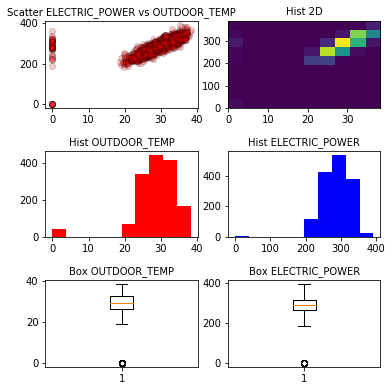

In [19]:
visual(header, OUTDOOR_TEMP, ELECTRIC_POWER)

### We can detect outlier values, since in Madrid in August the temperature can`t be 0 degrees

In [21]:
index_to_drop = [index for index, val in enumerate(OUTDOOR_TEMP) if val == 0]
ELECTRIC_POWER = [val for index, val in enumerate(ELECTRIC_POWER) if index not in index_to_drop]
OUTDOOR_TEMP = [val for index, val in enumerate(OUTDOOR_TEMP) if index not in index_to_drop]

In [22]:
print (info(header, [OUTDOOR_TEMP, ELECTRIC_POWER]))

defaultdict(None, {'OUTDOOR_TEMP': defaultdict(None, {'len': 1449, 'clases': {<class 'float'>}, 'na': 0, 'media': 29.42685514768802, 'std': 3.963016838173277, 'min': 18.765305, 'max': 38.310135}), 'ELECTRIC_POWER': defaultdict(None, {'len': 1449, 'clases': {<class 'float'>}, 'na': 0, 'media': 287.81427881297435, 'std': 35.88844333632387, 'min': 183.12, 'max': 391.71})})


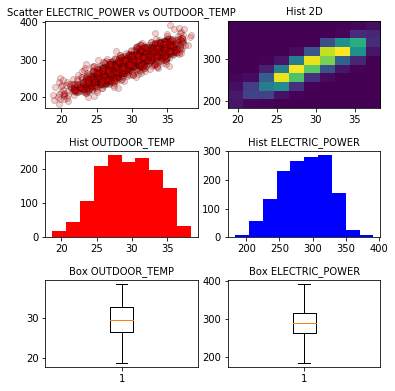

In [23]:
visual(header, OUTDOOR_TEMP, ELECTRIC_POWER)

### With the left up plot, we can see that seems to exist a relation between the outdoor temperature and the consumption to climatize the plant

### 4. Create/Split the training and testing data

In [26]:
records = [[x_val, y_val] for x_val, y_val in zip(OUTDOOR_TEMP, ELECTRIC_POWER)]
print(records[:5])
random.shuffle(records)
div = math.ceil(len(records)*0.8)
data_train = records[:div]
data_test = records[div:]
 
data_train_X = [ele[0] for ele in data_train]
data_train_y = [ele[1] for ele in data_train]
data_test_X = [ele[0] for ele in data_test]
data_test_y = [ele[1] for ele in data_test]

[[31.321108, 324.54], [24.938467, 252.7], [33.316906, 331.1], [26.947517, 270.8], [34.769539, 288.66]]


### 5. Create and train model

In [27]:
class Lin_reg():

    def __init__(self, X, Y):
        """
        :param X: lista con los valores de la variable de las abscisas
        :param y: lista con los valores de la variable de las ordenadas
        """
        self.X = X
        self.y = Y
        self.N = len(self.X)
        self.X_mean = sum(self.X) / len(self.X)
        self.y_mean = sum(self.y) / len(self.y)
        self.X_std = (1 / (self.N - 1) * sum((ele - self.X_mean) ** 2
                                             for ele in self.X)) ** 0.5
        self.y_std = (1 / (self.N - 1) * sum((ele - self.y_mean) ** 2
                                             for ele in self.y)) ** 0.5
        self.X_var = self.X_std ** 2
        self.y_var = self.y_std ** 2
        self.cov = sum([i * j for (i, j) in zip([ele - self.X_mean for ele in self.X],
                                                [ele - self.y_mean for ele in self.y])]) / (self.N)

        self.r = self.cov / (self.X_std * self.y_std)

    def Coeficientes(self):
        if len(self.X) != len(self.y):
            raise ValueError('unequal length')
        self.b = self.cov / self.X_var
        self.a = self.y_mean - (self.b * self.X_mean)
        return self.a, self.b

    def predict(self, X):
        yp = []
        for x in X:
            yp.append(self.a + self.b * x)
        return yp

In [28]:
mylinreg=Lin_reg(data_train_X,data_train_y)

In [29]:
a, b = mylinreg.Coeficientes()
print('La recta de regresión es: y = %f + %f * X'%(mylinreg.Coeficientes()))
print('El coeficiente de correlación es: r = %f' %mylinreg.r)

La recta de regresión es: y = 49.116462 + 8.118683 * X
El coeficiente de correlación es: r = 0.896890


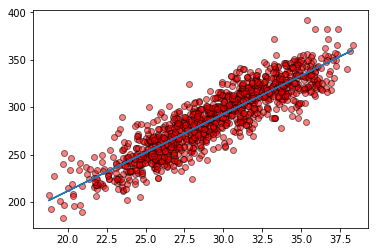

In [30]:
plt.scatter(data_train_X, data_train_y, c='r', edgecolors=(0, 0, 0), alpha=0.5)
plt.plot(data_train_X, [a + b * x for x in data_train_X])
plt.show()

### 6. Make prediction with the test data

In [32]:
predictions = mylinreg.predict(data_test_X)

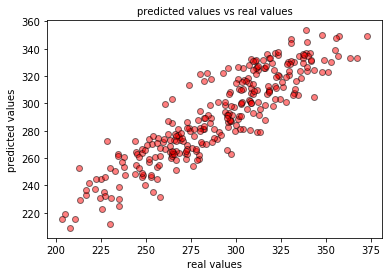

In [36]:
plt.scatter(data_test_y, predictions, c='r', edgecolors=(0, 0, 0), alpha=0.5)
plt.title('predicted values vs real values', fontsize=10)
plt.xlabel('real values')
plt.ylabel('predicted values')
plt.show()

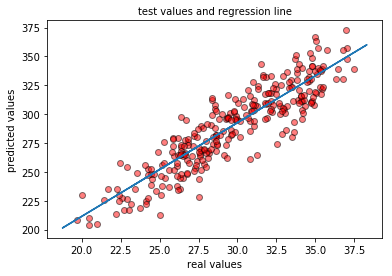

In [43]:
plt.scatter(data_test_X, data_test_y, c='r', edgecolors=(0, 0, 0), alpha=0.5)
plt.plot(data_train_X, [a + b * x for x in data_train_X])
plt.title('test values and regression line', fontsize=10)
plt.xlabel('real values')
plt.ylabel('predicted values')
plt.show()

### 7. Evaluate model

In [45]:
#Metricas
#Mean Error - Desviación media
ME = sum(y_pred - y_test for y_pred, y_test in zip(predictions,data_test_y)) / len(predictions)
#Mean Absolute Error (error absoluto medio)
MAE = sum(abs(y_pred - y_test) for y_pred, y_test in zip(predictions,data_test_y)) / len(predictions)
#Mean Square Error (error cuadrático medio)
MSE = sum((y_pred - y_test)**2 for y_pred, y_test in zip(predictions, data_test_y)) / len(predictions)
#Root Mean Square Error - error de la raíz cuadrada de la media RMSE
RMSE = MSE ** 0.5
#Standard Deviation of Residuals . Desviación típica de los residuos
SDR = (1 / (len(data_test_y) - 1) * sum((y_test - y_pred) ** 2
        for y_pred, y_test in zip(predictions, data_test_y))) ** 0.5

print ('Mean Error: %f' %ME)
print ('Mean Absolute Error: %f' %MAE)
print ('Mean Square Error: %f' %MSE)
print ('Root Mean Square Error: %f' %RMSE)
print ('Standard Desviation of Residuals: %f' %SDR)

Mean Error: 1.050431
Mean Absolute Error: 12.632821
Mean Square Error: 245.575505
Root Mean Square Error: 15.670849
Standard Desviation of Residuals: 15.698032


### We calculate R2, since that seeing that dependecy between both variables.

In [48]:
data_test_mean = sum(ele
    for ele in data_test_y) / len(data_test_y)
predictions_mean = sum(ele
    for ele in predictions) / len(predictions)

data_test_std = (1 / (len(data_test_y) - 1) * sum((ele - data_test_mean) ** 2
    for ele in data_test_y)) ** 0.5
predictions_std = (1 / (len(predictions) - 1) * sum((ele - predictions_mean) ** 2
    for ele in predictions)) ** 0.5
cov = sum([i * j
    for (i, j) in zip([ele - data_test_mean
        for ele in data_test_y], 
                      [ele - predictions_mean
        for ele in predictions])
]) / (len(predictions))

print('El coeficiente de correlación es: R2 = %f' % (cov ** 2 / (data_test_std ** 2 * predictions_std ** 2)))

El coeficiente de correlación es: R2 = 0.805391


### Our model can explain a 80% of relation bewteern this variables
### For the last, we go to show if the errors describe a binomial distribution

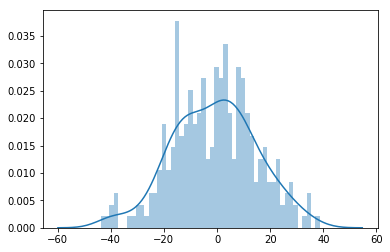

In [49]:
sns.distplot((np.asarray(data_test_y) - np.asarray(predictions)), bins = 50)
plt.show()